In [6]:
import numpy as np
import torch
import cv2
import sys

from vq_vae.auto_encoder import *

# load pretrained VQ-VAE to serve as a feature extractor
# Since VQ-VAE can binarize an image into features and does not
# lose too much information.
# now we're going to train VQ-VAE on FashionMNIST, CIFAR10, MINI-IMAGENET
# to verify our ideas of generalization.

# check pretrained VA-VQE on MNIST
net_mnist = VQ_CVAE(64, 10, num_channels=1)
net_mnist.load_state_dict(torch.load('results/2022-12-10_17-20-26/checkpoints/model_99.pth'))

<All keys matched successfully>

In [28]:
import torchvision as tv

data_mnist = tv.datasets.MNIST('../data/mnist/', train=False)
im_digits = [list() for _ in range(10)]
for _im, _digit in data_mnist:
    im_digits[_digit].append(np.array(_im))
im_digits = [np.stack(im_digits[i]) for i in range(len(im_digits))]
for i in range(len(im_digits)):
    print(im_digits[i].shape)

(980, 28, 28)
(1135, 28, 28)
(1032, 28, 28)
(1010, 28, 28)
(982, 28, 28)
(892, 28, 28)
(958, 28, 28)
(1028, 28, 28)
(974, 28, 28)
(1009, 28, 28)


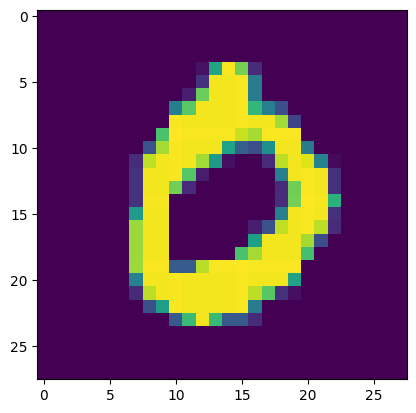

In [29]:
import matplotlib.pyplot as plt

plt.imshow(im_digits[0][0])

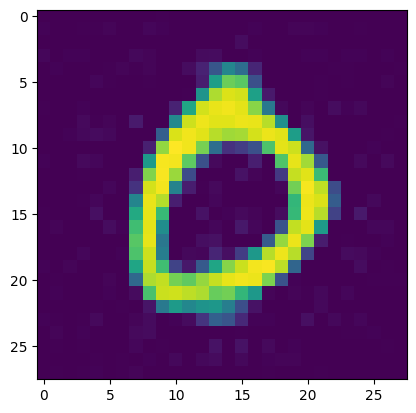

In [44]:
x =  torch.from_numpy(np.float32(im_digits[0][0].reshape([1,1,28,28])/255.0))
x_r, z_e, emb, argmin = net_mnist(x)
plt.imshow(np.uint8(np.clip(x_r.detach().numpy()[0][0], 0, 1)*255))

In [46]:
print(z_e.shape)
print(emb.shape)
print(argmin)

torch.Size([1, 64, 7, 7])
torch.Size([1, 64, 7, 7])
tensor([[[2, 2, 6, 6, 2, 2, 2],
         [2, 2, 7, 8, 0, 2, 2],
         [2, 7, 1, 4, 1, 6, 2],
         [2, 3, 5, 2, 8, 4, 2],
         [2, 8, 9, 7, 8, 9, 2],
         [2, 3, 4, 5, 9, 2, 2],
         [2, 2, 6, 0, 2, 2, 2]]])
